# Capstone Project 1
## National Park Trail Analysis



In [205]:
#data manipulating/organizing and plotting
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as pp
import pandas.plotting
import seaborn as sns

#stats packages
import scipy.stats as stats
from scipy.stats import ttest_ind, ttest_ind_from_stats
import numpy as np

In [2]:
#misc

import re
import mailbox
import csv


from IPython import display
from ipywidgets import interact, widgets

In [6]:
pd.set_option('display.max_colwidth', -1)
df = pd.read_csv(r'C:\Users\Evan\Programming\Jupiter Projects\NatPark Capstone\Trail Data\AllTrails data - nationalpark.csv')
#create a dataframe that won't be altered at all for any kind of necessary testing
og_df = pd.read_csv(r'C:\Users\Evan\Programming\Jupiter Projects\NatPark Capstone\Trail Data\AllTrails data - nationalpark.csv')
df.head(3)

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'waterfall', 'wild-flowers', 'wildlife']","['birding', 'camping', 'hiking', 'nature-trips', 'trail-running']",i
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers', 'wildlife']","['birding', 'camping', 'hiking', 'nature-trips', 'walking']",i
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildlife']","['hiking', 'walking']",i


# Clean and reorganize data for analysis

Check for any missing values within the dataset.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 47 columns):
trail_id             3313 non-null int64
name                 3313 non-null object
area_name            3313 non-null object
city_name            3313 non-null object
state_name           3313 non-null object
country_name         3313 non-null object
_geoloc              3313 non-null object
popularity           3313 non-null float64
length               3313 non-null float64
elevation_gain       3313 non-null float64
difficulty_rating    3313 non-null int64
route_type           3313 non-null object
visitor_usage        3060 non-null float64
avg_rating           3313 non-null float64
num_reviews          3313 non-null int64
features             3313 non-null object
activities           3313 non-null object
units                3313 non-null object
forest               3313 non-null int64
river                3313 non-null int64
no-dogs              3313 non-null int64
leash-dogs  

The only visible 'False' value is under 'visitor_usage'. 

Visitor usage seems to be the only column with any missing values (253 rows). Since this is only about 7.6% of the data the 253 rows will be omitted.

In [8]:
df = df.dropna()
df.info()
#left with 3060 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3060 entries, 0 to 3312
Data columns (total 47 columns):
trail_id             3060 non-null int64
name                 3060 non-null object
area_name            3060 non-null object
city_name            3060 non-null object
state_name           3060 non-null object
country_name         3060 non-null object
_geoloc              3060 non-null object
popularity           3060 non-null float64
length               3060 non-null float64
elevation_gain       3060 non-null float64
difficulty_rating    3060 non-null int64
route_type           3060 non-null object
visitor_usage        3060 non-null float64
avg_rating           3060 non-null float64
num_reviews          3060 non-null int64
features             3060 non-null object
activities           3060 non-null object
units                3060 non-null object
forest               3060 non-null int64
river                3060 non-null int64
no-dogs              3060 non-null int64
leash-dogs  

In [7]:
#go through each item in features and activities to create a new column for easier analysis

#new column for each feature
df['forest'] = df['features'].apply(lambda x: 1 if 'forest' in x else 0)
df['river'] = df['features'].apply(lambda x: 1 if 'river' in x else 0)
df['no-dogs'] = df['features'].apply(lambda x: 1 if 'dogs-no' in x else 0)
df['leash-dogs'] = df['features'].apply(lambda x: 1 if 'dogs-leash' in x else 0)
df['views'] = df['features'].apply(lambda x: 1 if 'views' in x else 0)
df['waterfall'] = df['features'].apply(lambda x: 1 if 'waterfall' in x else 0)
df['wildlife'] = df['features'].apply(lambda x: 1 if 'wildlife' in x else 0)
df['wild-flowers'] = df['features'].apply(lambda x: 1 if 'wild-flowers' in x else 0)
df['lake'] = df['features'].apply(lambda x: 1 if 'lake' in x else 0)
df['beach'] = df['features'].apply(lambda x: 1 if 'beach' in x else 0)
df['paved'] = df['features'].apply(lambda x: 1 if 'paved' in x else 0)
df['kids'] = df['features'].apply(lambda x: 1 if 'kids' in x else 0)
df['partially-paved'] = df['features'].apply(lambda x: 1 if 'partially-paved' in x else 0)
df['cave'] = df['features'].apply(lambda x: 1 if 'cave' in x else 0)
df['strollers'] = df['features'].apply(lambda x: 1 if 'strollers' in x else 0)

#new column for each activity
df['birding'] = df['activities'].apply(lambda x: 1 if 'birding' in x else 0)
df['hiking'] = df['activities'].apply(lambda x: 1 if 'hiking' in x else 0)
df['nature-trips'] = df['activities'].apply(lambda x: 1 if 'nature-trips' in x else 0)
df['walking'] = df['activities'].apply(lambda x: 1 if 'walking' in x else 0)
df['mountain-biking'] = df['activities'].apply(lambda x: 1 if 'mountain-biking' in x else 0)
df['trail-running'] = df['activities'].apply(lambda x: 1 if 'trail-running' in x else 0)
df['camping'] = df['activities'].apply(lambda x: 1 if 'camping' in x else 0)
df['fishing'] = df['activities'].apply(lambda x: 1 if 'fishing' in x else 0)
df['snowshoeing'] = df['activities'].apply(lambda x: 1 if 'snowshoeing' in x else 0)
df['fly-fishing'] = df['activities'].apply(lambda x: 1 if 'fly-fishing' in x else 0)
df['backpacking'] = df['activities'].apply(lambda x: 1 if 'backpacking' in x else 0)
df['horseback-riding'] = df['activities'].apply(lambda x: 1 if 'horseback-riding' in x else 0)
df['rock-climbing'] = df['activities'].apply(lambda x: 1 if 'rock-climbing' in x else 0)
df['scenic-driving'] = df['activities'].apply(lambda x: 1 if 'scenic-driving' in x else 0)


In [138]:
#now get rid of the original features/activity columns 
df.drop('features', axis=1, inplace=True)
df.drop('activities', axis=1, inplace=True)

KeyError: "['features'] not found in axis"

Maui has been discovered to be listed as its own state (it is a county/island within the state), combine this with Hawaii. The simplest solution here seems to be to just change the 'Maui' entries to 'Hawaii'.

In [10]:
#replace any instances of Maui as a state name with Hawaii
df['state_name']=df["state_name"].replace('Maui', "Hawaii")

During this reorganizing it has also been noticed that the country name for both Maui and Hawaii are listed as Hawaii, but of course these are both within the United States so this will be resolved as well.

In [11]:
#replace any isntances of Hawaii as a country name with United States
df['country_name']=df["country_name"].replace('Hawaii', "United States")

# Exploratory Data Analysis & Story Telling

Start by checking out how the trails are distributed through the country.

In [66]:
#Number of trails per state
df['state_name'].value_counts()

California        633
Washington        297
Wyoming           290
Utah              282
Colorado          242
Maine             175
Arizona           164
Virginia          163
Tennessee         162
Montana           144
North Carolina    109
Texas             91 
Ohio              50 
Hawaii            42 
Florida           29 
Alaska            28 
Nevada            25 
Kentucky          22 
Oregon            19 
North Dakota      19 
Arkansas          16 
Indiana           15 
South Dakota      15 
South Carolina    8  
New Mexico        8  
Minnesota         7  
Missouri          2  
Michigan          2  
Georgia           1  
Name: state_name, dtype: int64

It looks like California has a large lead on number of trails. Quite a few states have no national parks and some have very few trails within theirs - somehow Georgia managed to only have one trail.

In [77]:
df.loc[df['state_name']=='Georgia']

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,...,mountain-biking,trail-running,camping,fishing,snowshoeing,fly-fishing,backpacking,horseback-riding,rock-climbing,scenic-driving
1219,10259207,Clayton County International Park Trail,"Clayton Co International Park, Jonesboro GA",Jonesboro,Georgia,United States,"{'lat': 33.5312, 'lng': -84.31568}",4.7291,2574.944,36.8808,...,1,1,0,0,0,0,0,0,0,0


In [100]:
df = df[df.state_name != 'Georgia']

Upon further inspection the national park listed in Georgia is Clayton Co International Park, which is more of a local park/events space. Just to double check a quick web search confirms there are no national parks within the state (although still some great trails!). So Georgia was removed from the dataframe. Michigan and Missouri were also checked and are accurate. 

Fun fact: Missouri's Gateway Arch is the United State's smallest National Park.

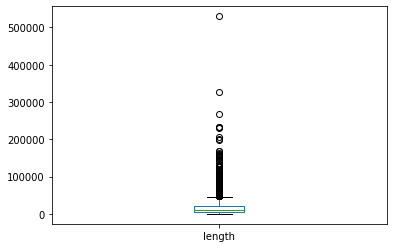

In [106]:
#take a look at trail lengths
df.length.plot(kind='box')
plt.show()

Almost all of the trails are under ~200000 yards (about 113 miles). Let's look at the outliers.

In [42]:
df.loc[df['name'] == 'Olympic Peninsula Loop Drive']

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
2753,10040050,Olympic Peninsula Loop Drive,Olympic National Park,Olympia,Washington,United States,"{'lat': 47.02164, 'lng': -122.90689}",9.9486,529794.728,5096.8656,1,loop,2.0,4.5,18,"['beach', 'forest', 'lake', 'kids', 'hot-springs', 'river', 'views', 'waterfall', 'wild-flowers', 'wildlife']","['birding', 'camping', 'fishing', 'nature-trips', 'scenic-driving', 'sea-kayaking']",i


The biggest outlier is a trail in Washington which is a driving loop around the Olympic Peninsula that is over 300 miles long.

In [122]:
trail_count = df.loc[df['length'] > 14999].count()
trail_count['trail_id']

1166

While the scale goes well over 500,000 (yards), theres only 191 entries that are longer than 50,000; about 28 miles. Over a third of the 3059 trails are shorter than 15,000, equivelant to 8.5 miles. Looking at the other end of the spectrum there are some entries less than a tenth of a mile long, and even one listed at 0.

In [115]:
df_length = df.sort_values('length')
df_length.head(3)

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,...,mountain-biking,trail-running,camping,fishing,snowshoeing,fly-fishing,backpacking,horseback-riding,rock-climbing,scenic-driving
2339,10333504,Newspaper Rock Trail,Canyonlands National Park,Monticello,Utah,United States,"{'lat': 37.98819, 'lng': -109.51825}",5.6874,0.000,0.0000,...,0,0,0,0,0,0,0,0,0,0
177,10258658,Walhalla Ruins,Grand Canyon National Park,North Rim,Arizona,United States,"{'lat': 36.13336, 'lng': -111.94147}",2.7978,160.934,0.0000,...,0,0,0,0,0,0,0,0,0,0
1139,10328659,Sunset View Trail,Black Canyon of the Gunnison National Park,Montrose,Colorado,United States,"{'lat': 38.56876, 'lng': -107.73352}",4.4651,160.934,0.9144,...,0,0,0,0,0,0,0,0,0,0


Newspaper Rock Trail has a length of 0. After looking it up it appears to be a large rock that doesn't really require any hiking at all (but is covered in Indian Petroglyphs (carvings)).

Let's take a look at elevation gain as it likely has a large factor in trail difficulty and in turn can affect trail choice by consumers.

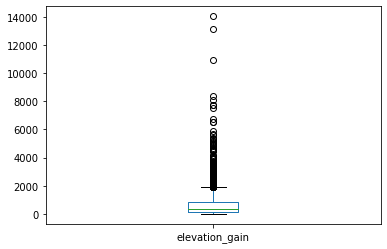

In [43]:
df.elevation_gain.plot(kind='box')
plt.show()

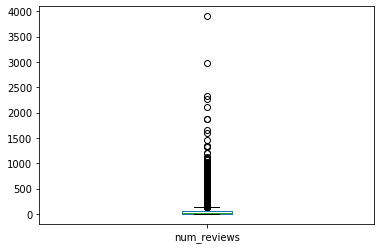

In [44]:
df.num_reviews.plot(kind='box')
plt.show()

This graph gives great insight into what trails are used the most (regardless of a positive or negative review). Let's take a look at number of reviews vs trail length.

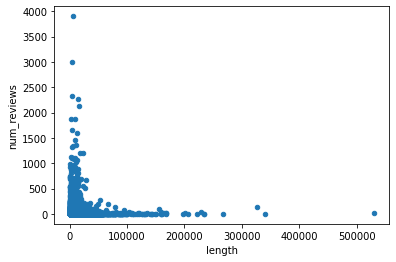

In [45]:
df.plot(kind='scatter', x='length', y='num_reviews')

This gives us a good look at trail usage even without the visitor_usage column.

In [ ]:
df.loc[df['state_name'] == 'Hawaii']

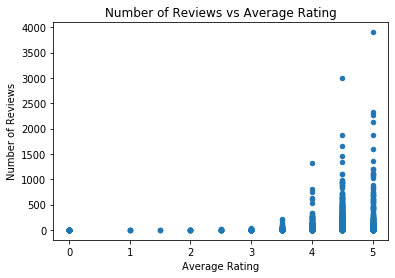

In [123]:
df.plot(kind='scatter', x='avg_rating', y='num_reviews')
plt.title('Number of Reviews vs Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Number of Reviews')
plt.show()

Not surprisingly, the number of reviews increases with average ratings. When a trail receives higher ratings more people are interested in using that trail and it continues to become more and more popular, getting more reviews and good ratings.

look at visitor usage as well.

Having seen how these three variables correlate with each other (positively), I'm interested to see how each feature / activity affects each one and if there are any differences with how they compare when looking at specific features.

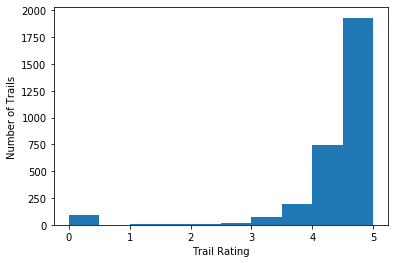

In [57]:
plt.hist(df.avg_rating)
plt.xlabel('Trail Rating')
plt.ylabel('Number of Trails')
plt.show()

The above histogram is interesting to me because it shows that users either love or strongly dislike a trail (or a strong feeling either way motivates them to rate a trail while if it was maybe "just okay" they dont bother giving it a rating).

# Inferential Statistical Analysis

In this sections we'll use frequentist statistical inference techniques to analyze the national park data, specifically ...

Null hypothesis: The average rating for California's trails are equal to those of Washington's

Alternative: The average ratings are not equal

Using an alpha of 5%, this two-tailed test will have a z-score of 1.96

In [198]:
#create variables to use for z testing
CA_mean = np.mean(df.loc[df['state_name'] == 'California'].avg_rating)
CA_sqrt_samp = np.sqrt(len(df.loc[df['state_name'] == 'California']))
WA_mean = np.mean(df.loc[df['state_name'] == 'Washington'].avg_rating)
WA_std = np.std(df.loc[df['state_name'] == 'Washington'].avg_rating)

In [199]:
#perform t test
z_test1 = (CA_mean - WA_mean) / (WA_std / CA_sqrt_samp)
z_test1

-11.285611232414636

The calculated z-score is -11.29 which is far to the left of our distribution and strongly recommends the null hypothesis to be rejected. This means that the average rating for California's trails are not equal to those of Washington's.

In [164]:
#calculate margin of error
SE = WA_std / (CA_sqrt_samp)
MOE = 1.96 * SE
print(f"The Margin of Error (MOE) is: {MOE*100:.2f}%")

The Margin of Error (MOE) is: 4.41%


The margin of error (MOE) is 4.41% meaning that the calculated z statistic will be within 4.41 percentage points of the real population 95% of the time.

Next, let's run a hypothesis test on popularity and elevation gain. 

Null hypothesis: Elevation gain has no effect on trail popularity

Alternative: Elevation gain has a positive or negative effect on trail popularity

In [200]:
#create variables to use for t and p-value tests
ele_gain_mean = np.mean(df.elevation_gain)
ele_gain_std = np.std(df.elevation_gain)
trail_pop_mean = np.mean(df.popularity)
trail_pop_std = np.std(df.popularity)

In [201]:
#ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=True)
ttest_ind_from_stats(ele_gain_mean, ele_gain_std, 3060, trail_pop_mean, trail_pop_std, 3060, equal_var=True)

Ttest_indResult(statistic=39.67835867001913, pvalue=1.3576212320450756e-306)

The t stat is 39.68 indicating that elevation gain has a strong affect on trail popularity. The p-value is far below the alpha (1.36e-306) supporting a rejection of the null hypothesis. A similar test and results can be ran with elevation gain and difficulty as well as shown below - as expected elevation gain has a significant affect on a trail's difficulty rating.

In [210]:
ttest_ind_from_stats(ele_gain_mean, ele_gain_std, 3060, np.mean(df.difficulty_rating), np.std(df.difficulty_rating), 3060, equal_var=True)

Ttest_indResult(statistic=40.059005971468366, pvalue=0.0)

# heatmap attempt (in progress)

In [166]:
zWY_mean = np.mean(df.loc[df['state_name'] == 'Wyoming'].visitor_usage)
zWY_sqrt_samp = np.sqrt(len(df.loc[df['state_name'] == 'Wyoming']))
zUT_mean = np.mean(df.loc[df['state_name'] == 'Utah'].visitor_usage)
zUT_std = np.std(df.loc[df['state_name'] == 'Utah'].visitor_usage)
 
z_test4 = (zWY_mean - zUT_mean) / (zUT_std / zWY_sqrt_samp)
z_test4

0.09821312223555757

In [34]:
df.columns

Index(['trail_id', 'name', 'area_name', 'city_name', 'state_name',
       'country_name', '_geoloc', 'popularity', 'length', 'elevation_gain',
       'difficulty_rating', 'route_type', 'visitor_usage', 'avg_rating',
       'num_reviews', 'units', 'forest', 'river', 'no-dogs', 'leash-dogs',
       'views', 'waterfall', 'wildlife', 'wild-flowers', 'lake', 'beach',
       'paved', 'kids', 'partially-paved', 'cave', 'strollers', 'birding',
       'hiking', 'nature-trips', 'walking', 'mountain-biking', 'trail-running',
       'camping', 'fishing', 'snowshoeing', 'fly-fishing', 'backpacking',
       'horseback-riding', 'rock-climbing', 'scenic-driving'],
      dtype='object')

In [129]:
df[['popularity', 'visitor_usage', 'avg_rating']]

In [125]:
states1 = df['state_name']
states1

0       Alaska
1       Alaska
2       Alaska
3       Alaska
4       Alaska
         ...  
3307    Hawaii
3308    Hawaii
3309    Hawaii
3311    Hawaii
3312    Hawaii
Name: state_name, Length: 3060, dtype: object

In [137]:
hm_columns_feat = df[['forest', 'river', 'no-dogs', 'leash-dogs',
       'views', 'waterfall', 'wildlife', 'wild-flowers', 'lake', 'beach',
       'paved', 'kids', 'partially-paved', 'cave', 'strollers']]
hm_columns_act = df[['birding',
       'hiking', 'nature-trips', 'walking', 'mountain-biking', 'trail-running',
       'camping', 'fishing', 'snowshoeing', 'fly-fishing', 'backpacking',
       'horseback-riding', 'rock-climbing', 'scenic-driving']]
hm_df = df[['popularity', 'visitor_usage', 'avg_rating', 'forest', 'river', 'no-dogs', 'leash-dogs']]
hm_col = df[['forest', 'river', 'no-dogs', 'leash-dogs']]
hm_col

,forest,river,no-dogs,leash-dogs
0,1,1,1,0
1,1,0,1,0
2,0,0,1,0
3,1,0,1,0
4,0,0,1,0
...,...,...,...,...
3307,0,0,1,0
3308,0,0,1,0
3309,0,0,1,0
3311,0,0,1,0


In [180]:
df.columns

Index(['trail_id', 'name', 'area_name', 'city_name', 'state_name',
       'country_name', '_geoloc', 'popularity', 'length', 'elevation_gain',
       'difficulty_rating', 'route_type', 'visitor_usage', 'avg_rating',
       'num_reviews', 'units', 'forest', 'river', 'no-dogs', 'leash-dogs',
       'views', 'waterfall', 'wildlife', 'wild-flowers', 'lake', 'beach',
       'paved', 'kids', 'partially-paved', 'cave', 'strollers', 'birding',
       'hiking', 'nature-trips', 'walking', 'mountain-biking', 'trail-running',
       'camping', 'fishing', 'snowshoeing', 'fly-fishing', 'backpacking',
       'horseback-riding', 'rock-climbing', 'scenic-driving'],
      dtype='object')

In [190]:
df_no_cats = df[['popularity', 'length', 'elevation_gain',
       'difficulty_rating', 'visitor_usage', 'avg_rating',
       'num_reviews', 'forest', 'river', 'no-dogs', 'leash-dogs',
       'views', 'waterfall', 'wildlife', 'wild-flowers', 'lake', 'beach',
       'paved', 'kids', 'partially-paved', 'cave', 'strollers', 'birding',
       'hiking', 'nature-trips', 'walking', 'mountain-biking', 'trail-running',
       'camping', 'fishing', 'snowshoeing', 'fly-fishing', 'backpacking',
       'horseback-riding', 'rock-climbing', 'scenic-driving']].fillna(0)

In [191]:
df_no_cats.dtypes

popularity           float64
length               float64
elevation_gain       float64
difficulty_rating    int64  
visitor_usage        float64
avg_rating           float64
num_reviews          int64  
forest               int64  
river                int64  
no-dogs              int64  
leash-dogs           int64  
views                int64  
waterfall            int64  
wildlife             int64  
wild-flowers         int64  
lake                 int64  
beach                int64  
paved                int64  
kids                 int64  
partially-paved      int64  
cave                 int64  
strollers            int64  
birding              int64  
hiking               int64  
nature-trips         int64  
walking              int64  
mountain-biking      int64  
trail-running        int64  
camping              int64  
fishing              int64  
snowshoeing          int64  
fly-fishing          int64  
backpacking          int64  
horseback-riding     int64  
rock-climbing 

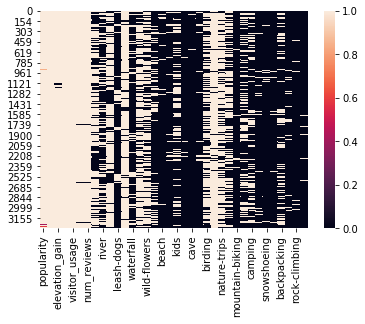

In [192]:
ax = sns.heatmap(df_no_cats, vmin=0, vmax=1)

In [179]:
sns.heatmap(df)
plt.show()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [136]:
hm_data = pd.pivot_table(hm_df, 
                     index=hm_rows, 
                     columns= hm_col)


#DF = df[df.columns].astype(float)
sns.heatmap(hm_data)
plt.show()

DataError: No numeric types to aggregate

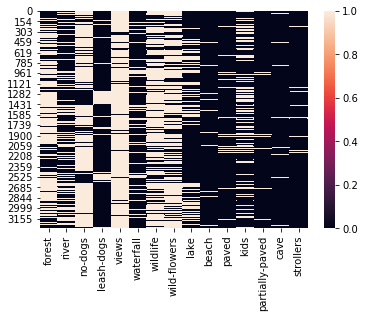

In [177]:
sns.heatmap(df[['forest', 'river', 'no-dogs', 'leash-dogs',
       'views', 'waterfall', 'wildlife', 'wild-flowers', 'lake', 'beach',
       'paved', 'kids', 'partially-paved', 'cave', 'strollers']])
plt.show()

In [90]:
hm_data

avg_rating                                                ...  \
forest                   0                                                ...   
river                    0                                                ...   
no-dogs                  0                                                ...   
leash-dogs               0                                                ...   
views                    0                                                ...   
waterfall                0                                             1  ...   
wildlife                 0                              1              0  ...   
wild-flowers             0               1              0         1    0  ...   
lake                     0               0    1         0         1    0  ...   
beach                    0          1    0    0         0         0    0  ...   
paved                    0          0    0    0         0         0    0  ...   
kids                     0     1    1    0    0    1    0    1    0    1  ...   
partially-paved          0     0    0    0    0    0    0    0    0    0  ...   
cave                     0     0    0    0    0    0    0    0    0    0  ...   
strollers                0     0    0    0    0    0    0    0    0    0  ...   
state_name                                                                ...   
Alaska          NaN        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...   
Arizona          5.0        4.00 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...   
Arkansas        NaN        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...   
California      NaN         4.25 NaN  NaN   5.0 NaN  NaN  NaN  NaN   4.5  ...   
Colorado        NaN        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...   
Florida         NaN        NaN   NaN  NaN  NaN  NaN  NaN   4.0 NaN  NaN   ...   
Georgia         NaN        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...   
Hawaii          NaN        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...   
Indiana         NaN        NaN    4.0 NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...   
Kentucky        NaN        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...   
Maine           NaN        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...   
Michigan        NaN        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...   
Minnesota       NaN        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...   
Missouri        NaN        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...   
Montana         NaN        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...   
Nevada          NaN        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...   
New Mexico      NaN        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...   
North Carolina  NaN        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...   
North Dakota    NaN        NaN   NaN  NaN  NaN  NaN   4.0 NaN  NaN  NaN   ...   
Ohio            NaN        NaN   NaN  NaN  NaN  NaN  NaN  NaN   4.5 NaN   ...   
Oregon          NaN        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...   
South Carolina  NaN        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...   
South Dakota    NaN        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...   
Tennessee       NaN        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...   
Texas           NaN         4.50 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...   
Utah            NaN        NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...   
Virginia        NaN        NaN   NaN   4.0 NaN  NaN  NaN  NaN  NaN  NaN   ...   
Washington      NaN        NaN   NaN  NaN  NaN   4.5 NaN  NaN  NaN  NaN   ...   
Wyoming         NaN         4.50 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...   

                walking                                                         
forest                1                                                         
river                 1                                                         
no-dogs               1                       

In [178]:
df.shape

(3060, 45)

In [131]:
hm_data = pd.pivot_table(df, 
                     index='does it matter', 
                     columns= hm_columns_feat)


#DF = df[df.columns].astype(float)
sns.heatmap(hm_data)
plt.show()

KeyError: 'does it matter'